# [**Prédictions probabilistes avec la classification par processus gaussien (GPC)**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_7_gaussian_process/plot_gpc.ipynb)<br/>([_Probabilistic predictions with Gaussian process classification (GPC)_](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpc.html))

Cet exemple illustre la probabilité prédite par la GPC pour un noyau RBF avec différents choix d'hyperparamètres. La première figure montre la probabilité prédite par la GPC avec des hyperparamètres choisis de manière arbitraire et avec les hyperparamètres correspondant à la log-vraisemblance marginale maximale (LML).

Alors que les hyperparamètres choisis en optimisant la LML ont une LML considérablement plus élevée, ils se comportent légèrement moins bien en termes de perte de logarithme sur les données de test. La figure montre que c'est parce qu'ils présentent un changement abrupt des probabilités de classe aux frontières de classe (ce qui est bon), mais ont des probabilités prédites proches de 0,5 loin des frontières de classe (ce qui est mauvais). Cet effet indésirable est causé par l'approximation de Laplace utilisée en interne par la GPC.

La deuxième figure montre la log-vraisemblance marginale pour différents choix des hyperparamètres du noyau, mettant en évidence les deux choix des hyperparamètres utilisés dans la première figure par des points noirs.

Log Marginal Likelihood (initial): -17.598
Log Marginal Likelihood (optimized): -3.875
Accuracy: 1.000 (initial) 1.000 (optimized)
Log-loss: 0.214 (initial) 0.319 (optimized)


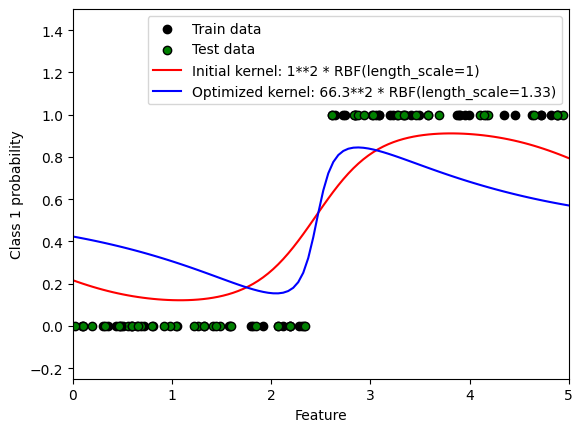

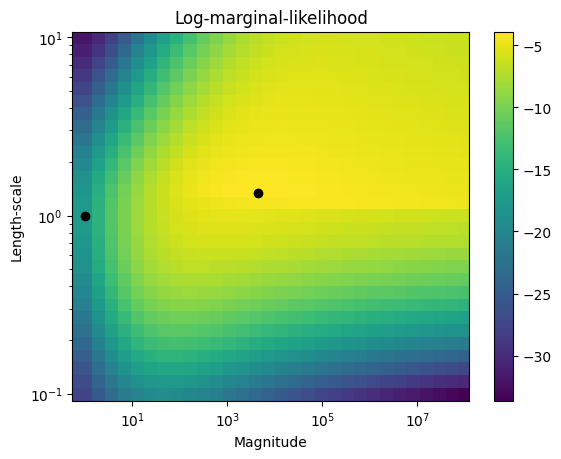

In [1]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, log_loss

# Generate data
train_size = 50
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 100)[:, np.newaxis]
y = np.array(X[:, 0] > 2.5, dtype=int)

# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0), optimizer=None)
gp_fix.fit(X[:train_size], y[:train_size])

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(X[:train_size], y[:train_size])

print(
    "Log Marginal Likelihood (initial): %.3f"
    % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta)
)
print(
    "Log Marginal Likelihood (optimized): %.3f"
    % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta)
)

print(
    "Accuracy: %.3f (initial) %.3f (optimized)"
    % (
        accuracy_score(y[:train_size], gp_fix.predict(X[:train_size])),
        accuracy_score(y[:train_size], gp_opt.predict(X[:train_size])),
    )
)
print(
    "Log-loss: %.3f (initial) %.3f (optimized)"
    % (
        log_loss(y[:train_size], gp_fix.predict_proba(X[:train_size])[:, 1]),
        log_loss(y[:train_size], gp_opt.predict_proba(X[:train_size])[:, 1]),
    )
)


# Plot posteriors
plt.figure()
plt.scatter(
    X[:train_size, 0], y[:train_size], c="k", label="Train data", edgecolors=(0, 0, 0)
)
plt.scatter(
    X[train_size:, 0], y[train_size:], c="g", label="Test data", edgecolors=(0, 0, 0)
)
X_ = np.linspace(0, 5, 100)
plt.plot(
    X_,
    gp_fix.predict_proba(X_[:, np.newaxis])[:, 1],
    "r",
    label="Initial kernel: %s" % gp_fix.kernel_,
)
plt.plot(
    X_,
    gp_opt.predict_proba(X_[:, np.newaxis])[:, 1],
    "b",
    label="Optimized kernel: %s" % gp_opt.kernel_,
)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# Plot LML landscape
plt.figure()
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [
    [
        gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])
    ]
    for j in range(Theta0.shape[1])
]
LML = np.array(LML).T
plt.plot(
    np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1], "ko", zorder=10
)
plt.plot(
    np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1], "ko", zorder=10
)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()